# Prediction using Supervised Machine Learning

In this regression exercise, a simple regression model is developed to predict the percentage of a student based on the number of study hours.

## Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb
import sys
!conda install --yes --prefix {sys.prefix} plotly
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Solving environment: ...working... done

# All requested packages already installed.



## Importing the Dataset 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

## Preparing the Dataset

In [3]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Preparing the Model

In [4]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Making Predictions Using the Model

In [5]:
y_pred = regr.predict(x)
print("When a student studies for 9.25 hrs, he would be scoring {} on an average.".format(regr.predict([[9.25]])[0]))

When a student studies for 9.25 hrs, he would be scoring 93.69173248737538 on an average.


## Comparing the Actual and Predicted Scores

In [6]:
Predictions = pd.DataFrame({'Hours Studied': x.flatten(),'Actual Percentage': y, 'Predicted Percentage' : y_pred.flatten()})
Predictions.head(5)

,Hours Studied,Actual Percentage,Predicted Percentage
0,2.5,21,26.794801
1,5.1,47,52.562508
2,3.2,27,33.732261
3,8.5,75,86.258740
4,3.5,30,36.705458


## Plotting the Regression Line

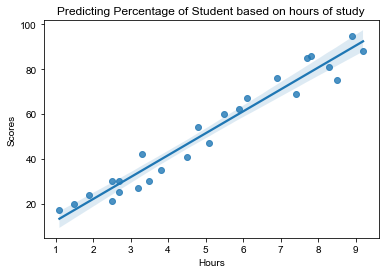

In [7]:
# Based on the model developed on the entire dataset
snb.regplot(x = "Hours", y = "Scores", data = data).set_title("Predicting Percentage of Student based on hours of study")
snb.set_style("white")
snb.set_palette(snb.color_palette("GnBu_r"))

In [15]:
# Based on the model developed using the training and testing data split
fig = go.Figure([
    go.Scatter(x=x_train.flatten(), y=y_train.flatten(), name='Train', mode='markers'),
    go.Scatter(x=x_test.flatten(), y=y_test.flatten(), name='Test', mode='markers')
])
fig.add_trace(go.Scatter(x=data.iloc[:,0].values, y=regr.coef_*data.iloc[:,0].values+regr.intercept_, name='Predicted Scores', mode = 'lines', line=dict(color='black', width=3)))
fig.update_layout(
    title="Predicting Percentage of Student based on hours of study",
    xaxis_title="Number of Study Hours",
    yaxis_title="Student Percentage",
    paper_bgcolor='orange',
    font=dict(
        family='serif',
        size=15,
        color="black"

    )
)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Evaluating the Model

In [9]:
#Checking the Root mean square error for the model
print('The mean error of the regression model for student score prediction is {}'.format(mean_squared_error(y, y_pred,squared=False)))

The mean error of the regression model for student score prediction is 5.388719677557471


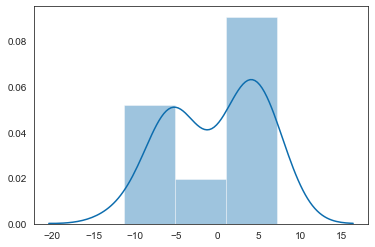

In [10]:
# Checking the distribution of the residuals 
residuals = (np.array(y) - np.array((regr.predict(x))))
snb.distplot(residuals)